# MLP Autoencoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

2025-04-29 18:49:49.992864: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 18:49:49.994986: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 18:49:50.001298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745945390.011720   23698 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745945390.014617   23698 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745945390.022709   23698 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

## Dataset

We are generating data from 2 different distribution: 
- Normal distribution: used as "normal" data. We are going to train the model with this data
- Uniform distribution: uses as "anomalous" data.

In [2]:
# Generate Data
# Normal data: 2D Gaussian
normal_data = np.random.normal(loc=0.0, scale=1.0, size=(4000, 2))
test_data = np.random.normal(loc=0.0, scale=1.0, size=(1000, 2))

# Anomalies: far from the center
anomalies = np.random.uniform(low=6, high=8, size=(1000, 2))

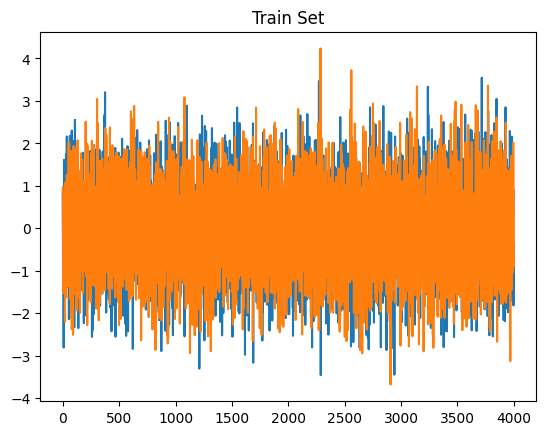

In [3]:
plt.plot(normal_data)
plt.title("Train Set")
plt.show()

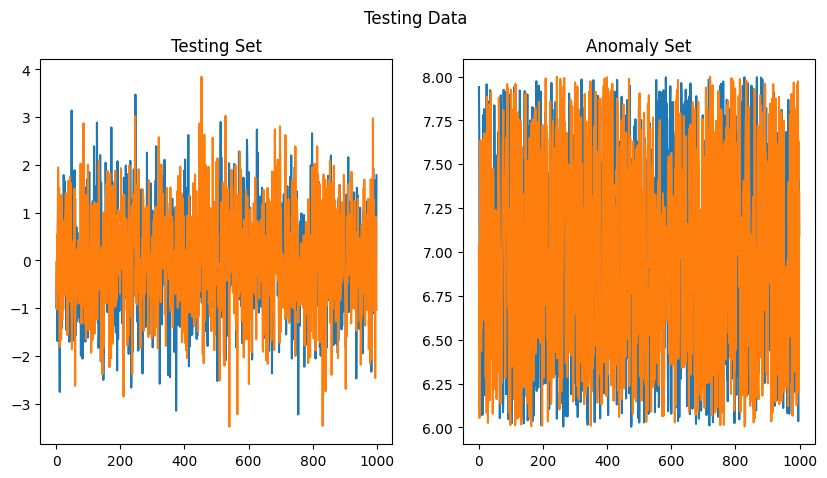

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle("Testing Data")
axs[0].plot(test_data)
axs[0].set_title("Testing Set")
axs[1].plot(anomalies)
axs[1].set_title("Anomaly Set")
plt.show()

In [5]:
# Apply a Normalization procedure
# NOTE: we are fitting the MinMaxScaler only with training data !
scaler = MinMaxScaler()
train_set_norm = scaler.fit_transform(normal_data)
test_set_norm = scaler.transform(test_data)
anom_set_norm = scaler.transform(anomalies)

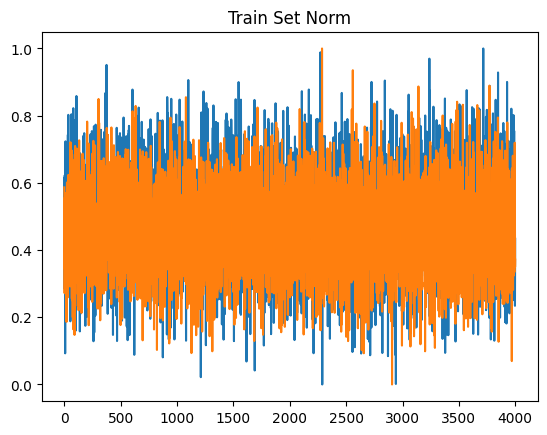

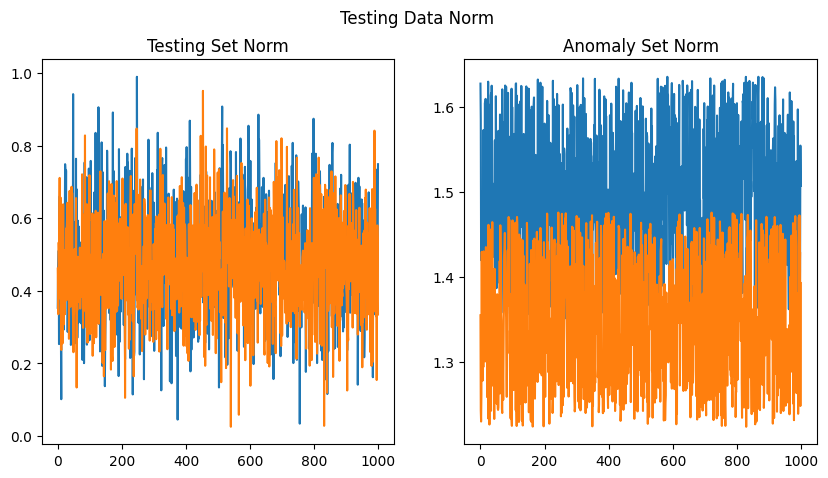

In [6]:
plt.plot(train_set_norm)
plt.title("Train Set Norm")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle("Testing Data Norm")
axs[0].plot(test_set_norm)
axs[0].set_title("Testing Set Norm")
axs[1].plot(anom_set_norm)
axs[1].set_title("Anomaly Set Norm")
plt.show()

## Model Structure

In [7]:
# Define input
input_dim = 2
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(10, activation='relu')(input_layer)
encoded = Dense(5, activation='relu')(encoded)
encoded = Dense(3, activation='relu')(encoded)

# Decoder
decoded = Dense(5, activation='relu')(encoded)
decoded = Dense(10, activation='relu')(decoded)
decoded = Dense(2, activation="sigmoid")(decoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer="adam", loss='mse')
autoencoder.summary()

E0000 00:00:1745945391.723284   23698 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745945391.726979   23698 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205 (820.00 B)

 Trainable params: 205 (820.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = autoencoder.fit(
    train_set_norm,
    train_set_norm,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.1, # use 10% of train data as validation set
    verbose=1,
    )

Epoch 1/50


113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0182 - val_loss: 0.0177
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 0.0144 - val_loss: 0.0130
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.0106 - val_loss: 0.0116
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.0094 - val_loss: 0.0109
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.0087 - val_loss: 0.0095
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.0075 - val_loss: 0.0052
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.0031 - val_loss: 0.0012
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 6.6335e-04 - val_loss: 4.8807e-04
Epoch 9/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 2.8845e-04 - val_loss: 2.9311e-04
Epoch 10/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 1.8999e-04 - val_loss: 2.2665e-04
Epoch 11/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 1.7883e-04 - val_loss: 1.7807e-04
Epoch 12/50

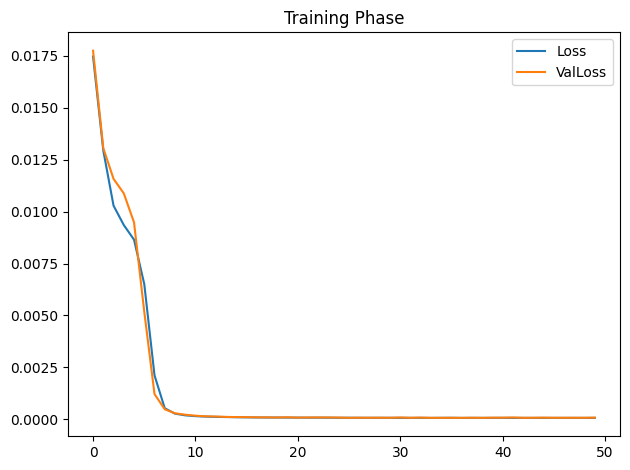

In [9]:
plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label="ValLoss")
plt.legend()
plt.title("Training Phase")
plt.tight_layout()
plt.show()

In [10]:
# Evaluate model results
train_eval = autoencoder.evaluate(train_set_norm, train_set_norm)
test_eval = autoencoder.evaluate(test_set_norm, test_set_norm)
anomaly_eval = autoencoder.evaluate(anom_set_norm, anom_set_norm)

print(f"Error on train set:{train_eval:.3g}")
print(f"Error on test set:{test_eval:.3g}")
print(f"Error on anomaly set:{anomaly_eval:.3g}")
print(f"Difference: {abs(test_eval - anomaly_eval):.3g}") # its pretty huge !

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 7.1619e-05
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 9.4845e-05
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.3718
Error on train set:8.22e-05
Error on test set:9.66e-05
Error on anomaly set:0.373
Difference: 0.373


In [11]:
# This function will plot original data vs Model's output
def original_vs_model(dataset, title=""):
    predicted = autoencoder.predict(dataset)

    fig, axs = plt.subplots(2, figsize=(10,5))

    axs[0].plot(dataset[:, 0])
    axs[0].plot(predicted[:, 0], alpha=.6)
    axs[1].plot(dataset[:, 1])
    axs[1].plot(predicted[:, 1], alpha=.6)
    axs[0].legend(["Original", "Model"]) 
    axs[1].legend(["Original", "Model"]) 
    fig.suptitle(title)

    plt.tight_layout()
    plt.show()

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step


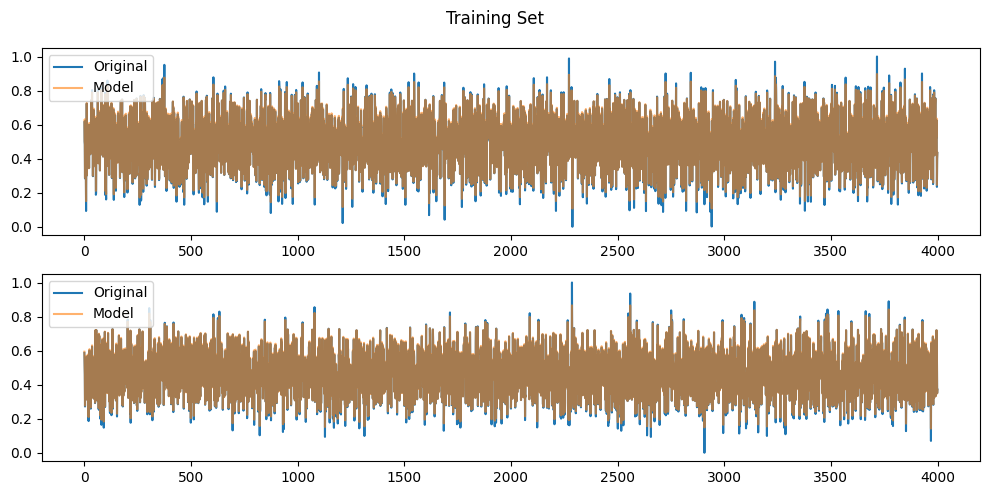

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


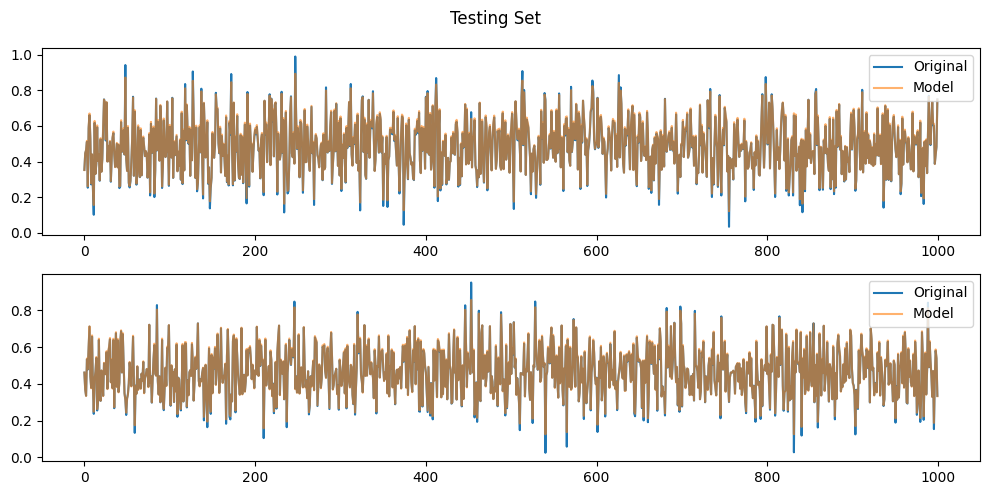

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step


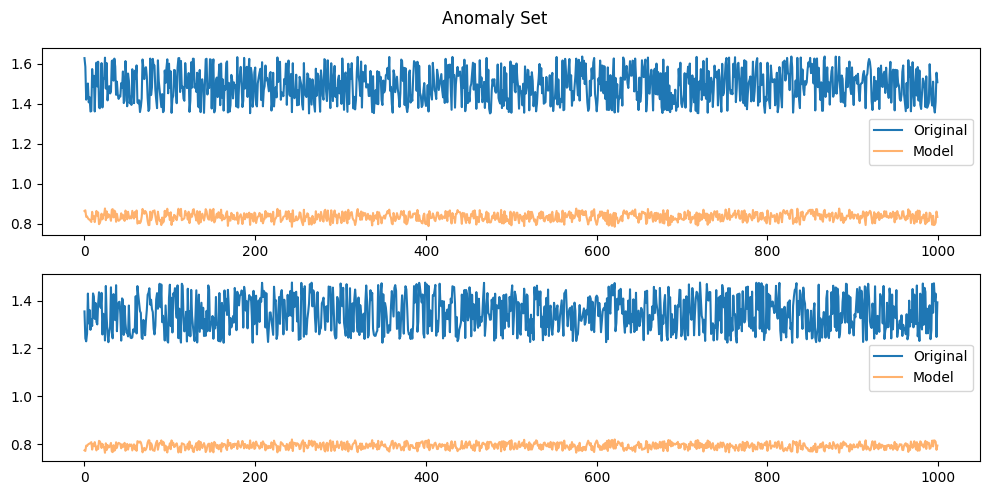

In [12]:
# Visually evaluate the model's reconstruction ability
original_vs_model(train_set_norm, title="Training Set")
original_vs_model(test_set_norm, title="Testing Set")
original_vs_model(anom_set_norm, title="Anomaly Set")

We can see that model prediction on the anomaly set is very far from the original ones. It should be quite easy to find a good threshold !

In [13]:
# Compute the reconstruction error for each point
# We are sorting rec. errors so we can easily find a threshold for anomaly detection
def compute_plot_rec_error(dataset, plot=True, title="", color="tab:green"):
    r_errors = []
    _mse = lambda orig, pred: np.square(orig - pred).mean()

    preds = autoencoder.predict(dataset)
        
    actual_errors = [_mse(dataset[i], preds[i]) for i in range(len(preds))]
    r_errors.extend(actual_errors)

    if plot:
        plt.scatter(x=range(len(r_errors)), y=sorted(r_errors), s=3.0, c=color)
        plt.title(title)
        plt.tight_layout()
        plt.show()
    
    return r_errors

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


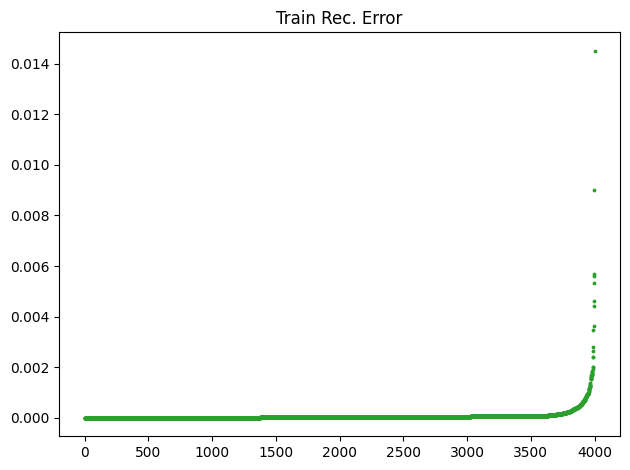

In [14]:
norm_rec_error = compute_plot_rec_error(train_set_norm, title="Train Rec. Error")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step


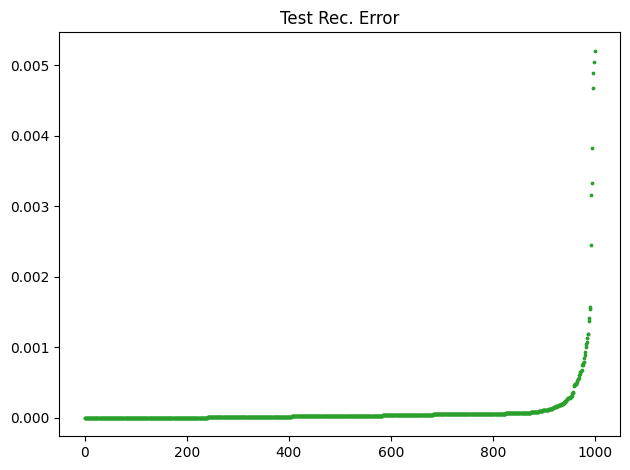

In [15]:
normtest_rec_error = compute_plot_rec_error(test_set_norm, title="Test Rec. Error")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step


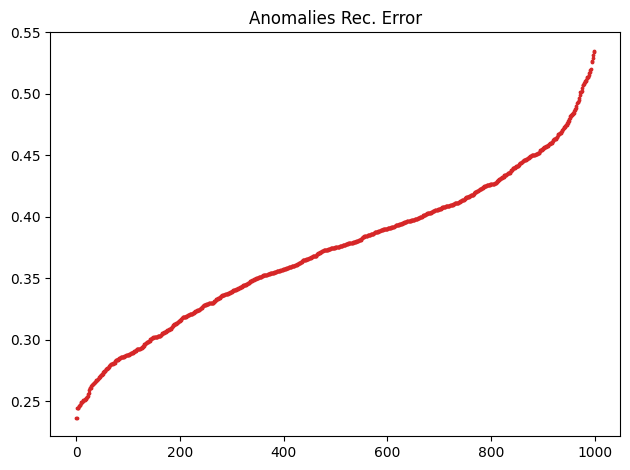

In [16]:
anom_rec_error = compute_plot_rec_error(anom_set_norm, title="Anomalies Rec. Error", color="tab:red")

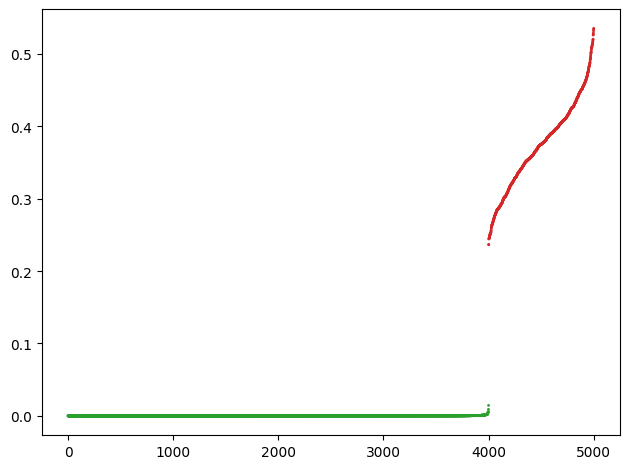

In [17]:
# Combine them into a single plot
all_rec_errs = tuple(zip(norm_rec_error, ["tab:green"]*len(norm_rec_error))) + tuple(zip(anom_rec_error, ["tab:red"]*len(anom_rec_error)))
all_rec_errs = sorted(all_rec_errs, key=lambda x: x[0])

plt.scatter(
    x=range(len(all_rec_errs)),
    y=[x for x, _ in all_rec_errs],
    c=[y for _, y in all_rec_errs],
    s=1.0,
    )
plt.tight_layout()
plt.show()

As we can se from the previous chart, its very easy to find a good threshold to divide "normal" data from "anomalous" ones.
We can just choose one value between 0.1 and 0.11 (more or less)

In [18]:
def count_anomalies(rec_errors, threshold, name=""):
    # Anomaly detection on apple_test samples
    count_anomaly = 0

    # in this case count_anomaly represents the FP (apples that are classified as anomalies)
    count_anomaly = sum(i > threshold for i in rec_errors)

    print(f"{name} anomaly {count_anomaly} over a total of {len(rec_errors)} {name}")
    print(f"{(count_anomaly/(len(rec_errors)) * 100):.2f} %")

    return count_anomaly

In [19]:
threshold = 0.05

In [20]:
norm_count_anom = count_anomalies(norm_rec_error, threshold, name="norm.")
normtest_count_anom = count_anomalies(normtest_rec_error, threshold, name="norm. test")
anom_count_anom = count_anomalies(anom_rec_error, threshold, name="anomalies")

norm. anomaly 0 over a total of 4000 norm.
0.00 %
norm. test anomaly 0 over a total of 1000 norm. test
0.00 %
anomalies anomaly 1000 over a total of 1000 anomalies
100.00 %


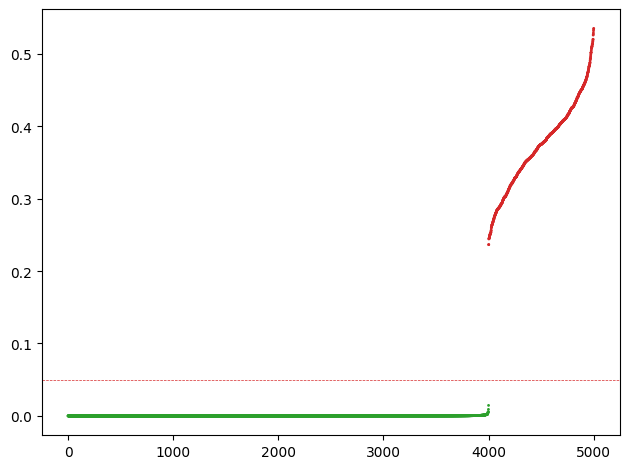

In [21]:
# Combine them into a single plot
all_rec_errs = tuple(zip(norm_rec_error, ["tab:green"]*len(norm_rec_error))) + tuple(zip(anom_rec_error, ["tab:red"]*len(anom_rec_error)))
all_rec_errs = sorted(all_rec_errs, key=lambda x: x[0])

plt.scatter(
    x=range(len(all_rec_errs)),
    y=[x for x, _ in all_rec_errs],
    c=[y for _, y in all_rec_errs],
    s=1.0,
    )
plt.axhline(threshold, color="tab:red", linestyle="--", linewidth=.5)
plt.tight_layout()
plt.show()